<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing/blob/main/Circuit_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

# Qiskit Basics

In [1]:
import numpy as np
from qiskit import QuantumCircuit

In [2]:
# building a circuit

qc = QuantumCircuit(3)


# adding gates

qc.h(0)
qc.cx(0,1)

qc.cx(0,2)

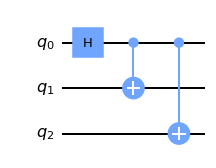

In [3]:
qc.draw('mpl')

## Simulating the Circuits

In [5]:
from qiskit.quantum_info import Statevector
# setting the initial state to 0
state = Statevector.from_int(0,2**3)

state = state.evolve(qc)

state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.quantum_info import Statevector
# setting the initial state to 1
state = Statevector.from_int(1,2**3)

state = state.evolve(qc)

state.draw('latex')

<IPython.core.display.Latex object>

Below we use the visualization function to plot the bloch sphere and a hinton representing the real and the imaginary components of the state density matrix $\rho$

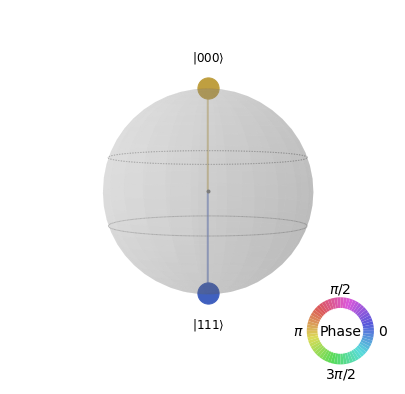

In [7]:
state.draw('qsphere')

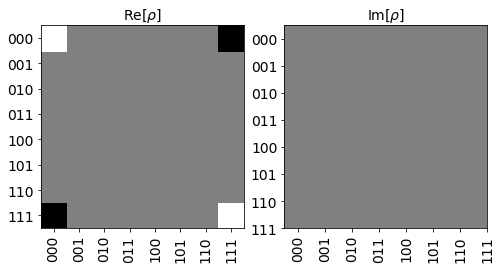

In [8]:
state.draw('hinton')

## Unitary Representation of a Circuit
The quant_info module of qiskit has an operator method that can be used to make unitary operator for the circuit.

In [9]:
from qiskit.quantum_info import Operator
U = Operator(qc)

U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

## Open QASM backend
The simulators above are useful, as they help us in providing information about the state output and matrix representation of the circuit.
Here we would learn about more simulators that will help us in measuring the circuit

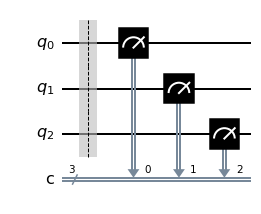

In [10]:
qc2 = QuantumCircuit(3,3)
qc2.barrier(range(3))

# do the measurement
qc2.measure(range(3), range(3))
qc2.draw('mpl')

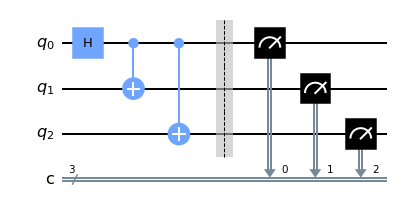

In [11]:
# now, if we want to add both the qc and qc2 circuit

circ = qc2.compose(qc, range(3), front = True)

circ.draw('mpl')

This circuit adds a classical register , and three measurement that are used to map the outcome of qubits to the classical bits.

To simulate this circuit we use the 'qasm_simulator' in Qiskit Aer. Each single run will yield a bit string $000$ or $111$. To build up the statistics about the distribution , we need to repeat the circuit many times.

The number of times the circuit is repeated is specified in the 'execute' function via the 'shots' keyword. 

In [14]:
from qiskit import transpile 

# import the qasm simulator

from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

# first transpile the quantum circuit to low level QASM instructions

qc_compiled = transpile(circ, backend)

# execute the circuit

job_sim = backend.run(qc_compiled, shots=1024)

# get the result

result_sim = job_sim.result()

Since, the code has run, we can count the number of specific ouputs it recieved and plot it too.


In [15]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 479, '000': 545}


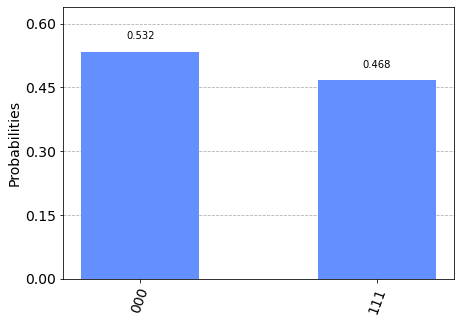

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)